In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.rename(columns={'gender':'Sexo', 'race/ethnicity':'Etnia', 'parental level of education':'Escolaridade_Pais', 'lunch':'Almoço',
                   'test preparation course':'Teste_Preparativo', 'math score': 'Matematica', 'reading score': 'Leitura',
                   'writing score': 'Escrita'}, inplace=True)
## para renomear as colunas, a fim de facilitar as consultas
df

,Sexo,Etnia,Escolaridade_Pais,Almoço,Teste_Preparativo,Matematica,Leitura,Escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
## TOTAL DE LINHAS E COLUNAS
df.shape

(1000, 8)

In [5]:
## TIPOS DE VARIAVEIS
df.dtypes

Sexo                 object
Etnia                object
Escolaridade_Pais    object
Almoço               object
Teste_Preparativo    object
Matematica            int64
Leitura               int64
Escrita               int64
dtype: object

In [6]:
## COMPARAÇÃO DE QUANTAS PESSOAS DO SEXO FEMINO E MASCULINO
df['Sexo'].value_counts()

Sexo
female    518
male      482
Name: count, dtype: int64

In [7]:
## COMPARAÇÃO DE QUANTAS PESSOAS POR GRUPO DE RAÇA/ETNIA
df['Etnia'].value_counts().sort_index()

Etnia
group A     89
group B    190
group C    319
group D    262
group E    140
Name: count, dtype: int64

In [8]:
## MEDIA, MEDIANA, NOTA MÁXIMA E NOTA MÍNIMA POR SEXO E ETNIA
## crosstab gera essa tabela com os dados que eu quero
## função aggfunc cria uma lista com todas as funções que eu quero usar
analise_mat = pd.crosstab(df.Sexo, df.Etnia, aggfunc = {'mean','median','max', 'min'}, values = df.Matematica)
analise_mat

max                                       mean             \
Etnia  group A group B group C group D group E    group A    group B   
Sexo                                                                   
female      92      97      96      98     100  58.527778  61.403846   
male       100      94      98     100     100  63.735849  65.930233   

                                         median                          \
Etnia     group C    group D    group E group A group B group C group D   
Sexo                                                                      
female  62.033333  65.248062  70.811594    57.0    62.0    63.0    65.0   
male    67.611511  69.413534  76.746479    63.0    65.0    68.0    71.0   

                   min                                  
Etnia  group E group A group B group C group D group E  
Sexo                                                    
female    71.0      34       8       0      26      32  
male      78.0      28      30      27      39      30

In [9]:
## NOTA MÉDIA GERAL DE MATEMÁTICA
df.Matematica.mean()

66.089

In [10]:
## NOTA MEDIANA DE MATEMÁTICA
df.Matematica.median()

66.0

In [11]:
## NOTA MÉDIA DE MATEMÁTICA POR SEXO
## agrupamente por sexo e média da Matemática
df.groupby(['Sexo'])['Matematica'].mean()

Sexo
female    63.633205
male      68.728216
Name: Matematica, dtype: float64

In [12]:
## NOTA MÉDIA POR ETNIA
df.groupby(['Etnia'])['Matematica'].mean()

Etnia
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: Matematica, dtype: float64

In [13]:
## NOTA MÉDIA DE MATEMÁTICA POR ESCOLARIDADE DOS PAIS
df.groupby(['Escolaridade_Pais'])['Matematica'].mean()

Escolaridade_Pais
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: Matematica, dtype: float64

In [14]:
## NOTA MÉDIA DE MATEMÁTICA POR TESTE PREPARATIVO
df.groupby(['Teste_Preparativo'])['Matematica'].mean()

Teste_Preparativo
completed    69.695531
none         64.077882
Name: Matematica, dtype: float64

In [16]:
## VARIANCIA
df.Matematica.var()

229.91899799799796

In [17]:
## DESVIO MÉDIO
df.Matematica.std()

15.16308009600945

<Axes: title={'center': 'Comparação de notas de Matemática segundo Sexo e Etnia'}, xlabel='Cor', ylabel='Nota de Matemática'>

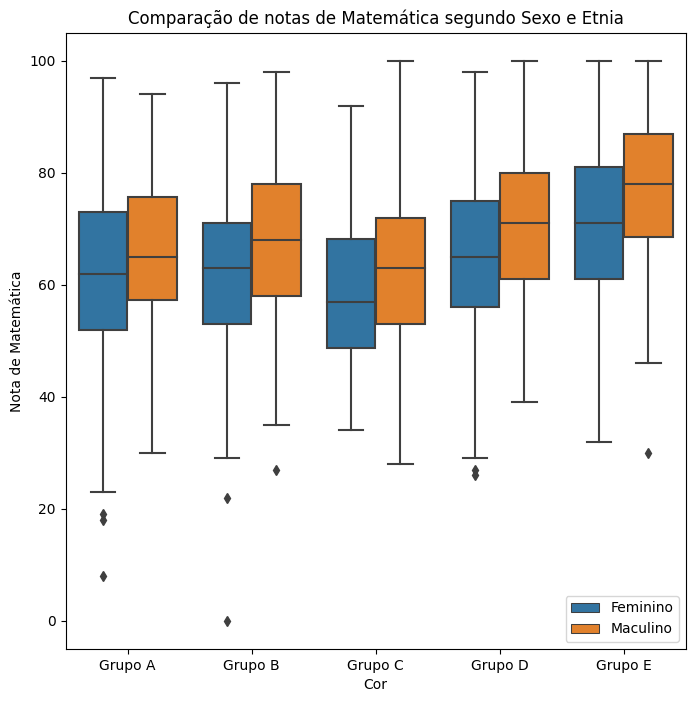

In [18]:
ax = sns.boxplot(data=df, x='Etnia', y='Matematica', hue='Sexo')
## cria o boxplot e define as variaveis
ax.figure.set_size_inches(8, 8)
## tamanho da figura
ax.set_title('Comparação de notas de Matemática segundo Sexo e Etnia')
## altera o título
ax.set_xlabel('Cor')
## altera o nome do Eixo X
ax.set_ylabel('Nota de Matemática')
## altera o nome do Eixo Y
ax.set_xticklabels(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
## Altera os nomes dos dados do Eixo X
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino','Maculino'])
## Altera os nomes na legenda
ax


<Axes: title={'center': 'Comparação de notas de Leitura segundo Sexo e Etnia'}, xlabel='Cor', ylabel='Nota de Leitura'>

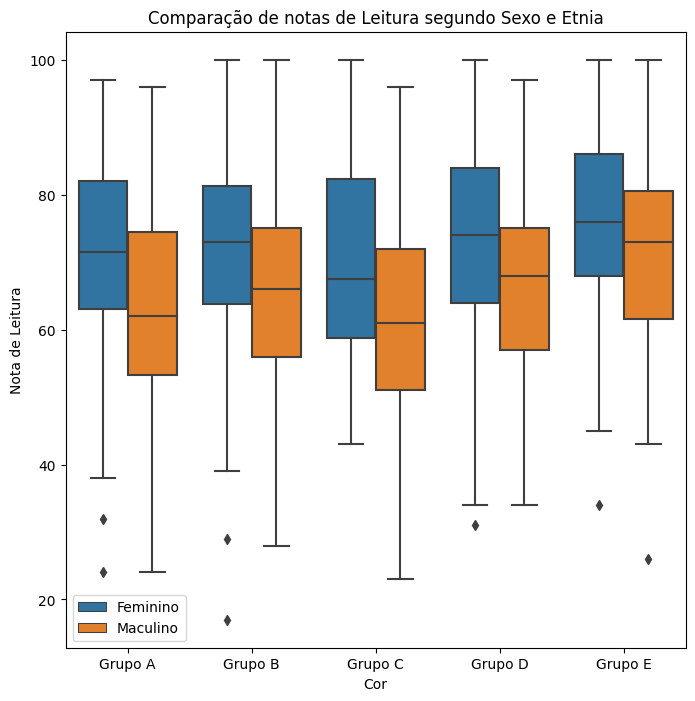

In [19]:
ax = sns.boxplot(data=df, x='Etnia', y='Leitura', hue='Sexo')
ax.figure.set_size_inches(8, 8)
ax.set_title('Comparação de notas de Leitura segundo Sexo e Etnia')
ax.set_xlabel('Cor')
ax.set_ylabel('Nota de Leitura')
ax.set_xticklabels(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino','Maculino'])
ax

<Axes: title={'center': 'Comparação de notas de Escrita segundo Sexo e Etnia'}, xlabel='Cor', ylabel='Nota de Escrita'>

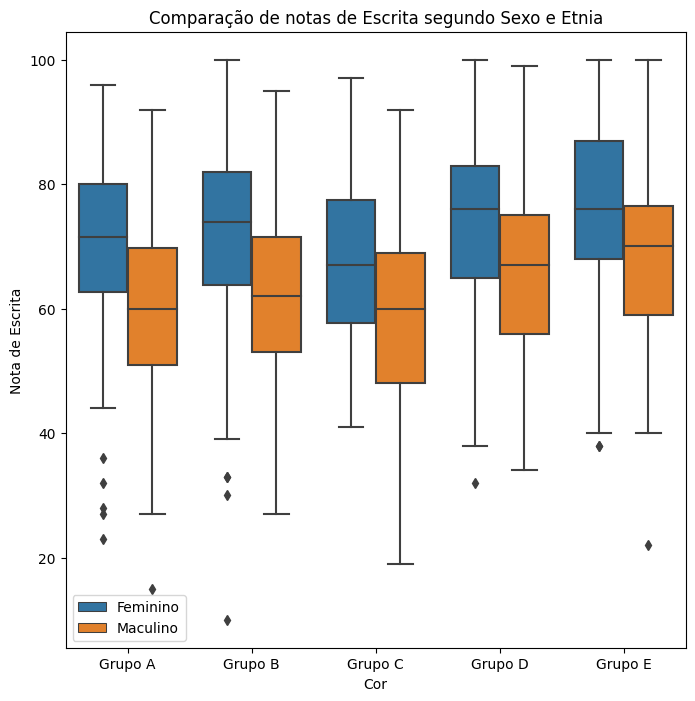

In [20]:
ax = sns.boxplot(data=df, x='Etnia', y='Escrita', hue='Sexo')
ax.figure.set_size_inches(8, 8)
ax.set_title('Comparação de notas de Escrita segundo Sexo e Etnia')
ax.set_xlabel('Cor')
ax.set_ylabel('Nota de Escrita')
ax.set_xticklabels(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino','Maculino'])
ax

In [ ]:
## OBSERVAÇÃO: apesar da diferença não ser muito discrepante, é possível observar que pessoas do sexo
##             masculino, independente da raça/etnia, tiveram desempenho melhor em matemática, e pessoas
##             do sexo feminino tiveram melhor desempenho em leitura e escrita.

<Axes: title={'center': 'Comparação das notas de Matemática segundo o Grau de Escolaridade dos Pais'}, xlabel='Grau de Escolaridade dos Pais', ylabel='Nota de Matemática'>

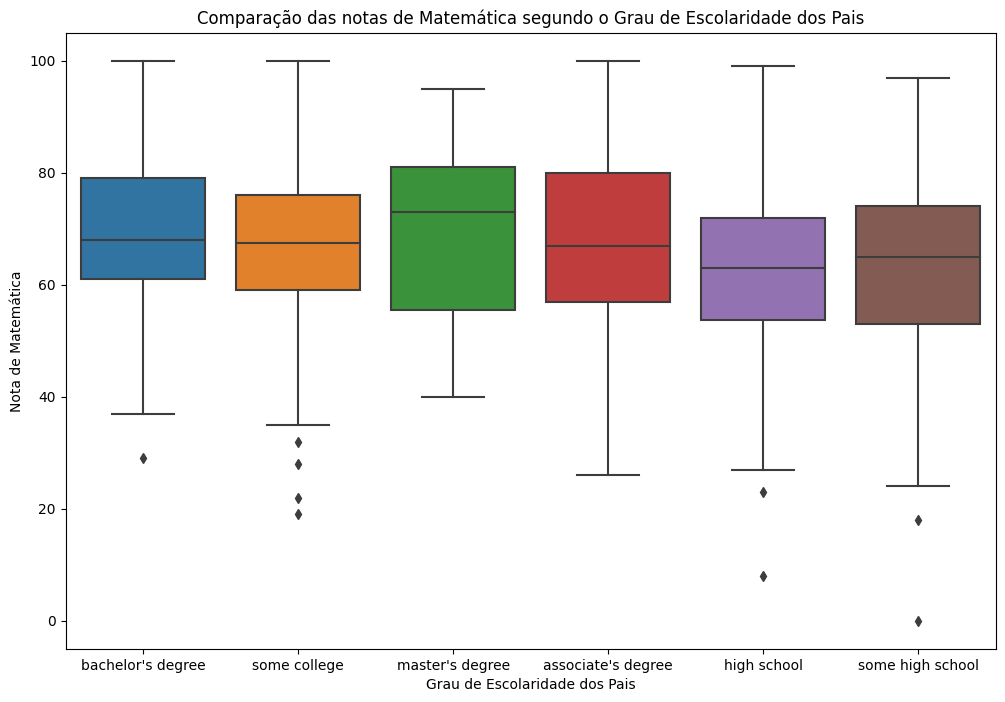

In [21]:
ax = sns.boxplot(data=df, x='Escolaridade_Pais', y='Matematica')
ax.figure.set_size_inches(12, 8)
ax.set_title('Comparação das notas de Matemática segundo o Grau de Escolaridade dos Pais')
ax.set_xlabel('Grau de Escolaridade dos Pais')
ax.set_ylabel('Nota de Matemática')
ax

In [ ]:
## OBSERVAÇÃO: com relação as notas de matemática, as diferenças não foram muito
##             grandes. Os filhos de pais que possuem mestrado, tiveram a mediana maior.
##             Vale ressaltar que os dados desses alunos são assimétricos, por isso
##             a mediana é a medida mais indicada. Os demais dados são simétricos.

<Axes: title={'center': 'Comparação das notas de Leitura segundo o Grau de Escolaridade dos Pais'}, xlabel='Grau de Ecolaridade dos Pais', ylabel='Nota de Leitura'>

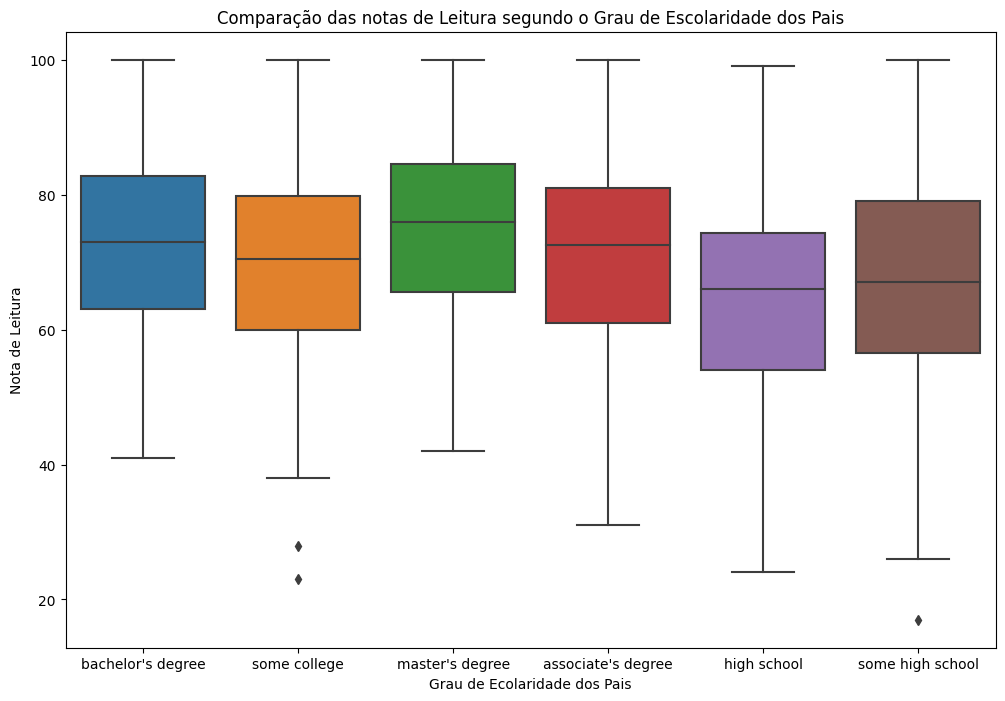

In [22]:
ax = sns.boxplot(data=df, x='Escolaridade_Pais', y='Leitura')
ax.figure.set_size_inches(12, 8)
ax.set_title('Comparação das notas de Leitura segundo o Grau de Escolaridade dos Pais')
ax.set_xlabel('Grau de Ecolaridade dos Pais')
ax.set_ylabel('Nota de Leitura')
ax

In [ ]:
## OBSERVAÇÃO: com relação as notas de leitura, todos os dados podem ser considerados simétricos.
##             Os filhos de pais que fizeram apenas escola secundária ou ensino médio,
##             tiveram um desempenho um pouco inferior. Vemos que suas notas mínimas foram as
##             mais baixas, bem como suas medianas. Observamos um melhor desempenho nos alunos,
##             cujo os pais possuem mestrado.

<Axes: title={'center': 'Comparação das notas de Escrita segundo o Grau de Escolaridade dos Pais'}, xlabel='Grau de Escolaridade dos Pais', ylabel='Nota de Escrita'>

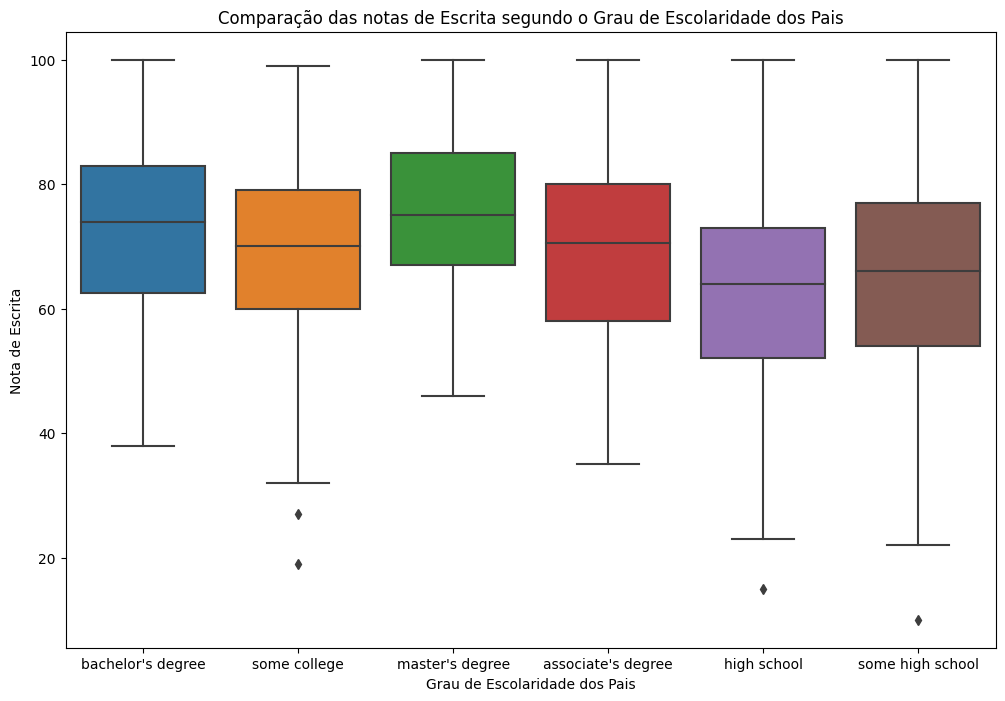

In [23]:
ax = sns.boxplot(data=df, x='Escolaridade_Pais', y='Escrita')
ax.figure.set_size_inches(12, 8)
ax.set_title('Comparação das notas de Escrita segundo o Grau de Escolaridade dos Pais')
ax.set_xlabel('Grau de Escolaridade dos Pais')
ax.set_ylabel('Nota de Escrita')
ax

In [ ]:
## OBSERVAÇÃO: as notas de escrita, possuem uma análise similar com as notas de leitura.
##             Os filhos de pais que fizeram apenas escola secundária ou ensino médio,
##             tiveram um desempenho um pouco inferior. Vemos que suas notas mínimas foram as
##             mais baixas, bem como suas medianas. Observamos um melhor desempenho nos alunos,
##             cujo os pais possuem mestrado.

<Axes: title={'center': 'Comparação das notas de Matemática segundo quem fez Curso Preparatório'}, xlabel='Teve ou não curso preparatório', ylabel='Nota de Matemática'>

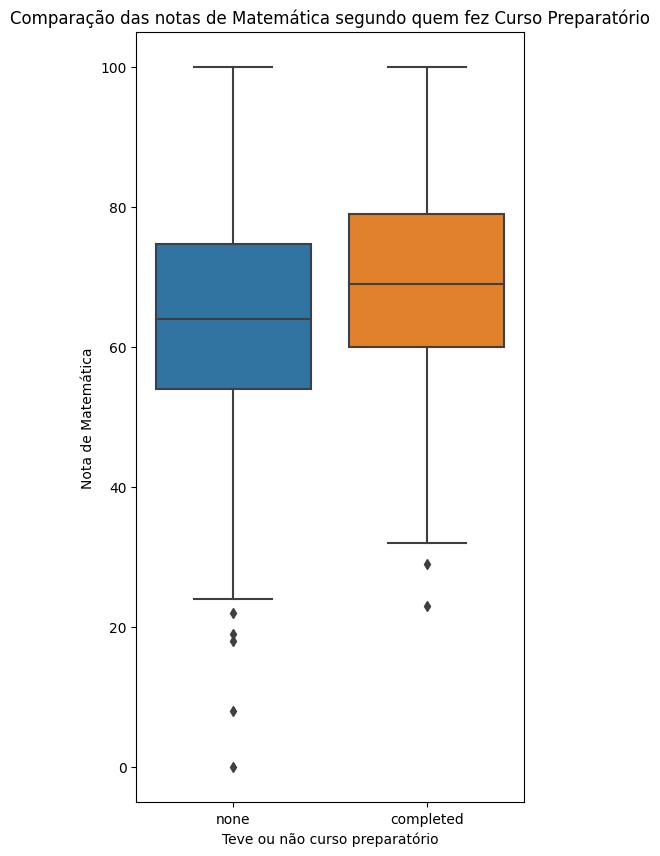

In [24]:
ax = sns.boxplot(data=df, x='Teste_Preparativo', y='Matematica')
ax.figure.set_size_inches(5, 10)
ax.set_title('Comparação das notas de Matemática segundo quem fez Curso Preparatório')
ax.set_xlabel('Teve ou não curso preparatório')
ax.set_ylabel('Nota de Matemática')
ax

In [ ]:
###   OBSERVAÇÃO: O desempenho de quem realizou um curso preparatório foi melhor
###   que aqueles que não realizaram.

<Axes: title={'center': 'Comparação das notas de Matemática segundo o tipo de Almoço'}, xlabel='Tipo de Almoço', ylabel='Nota de Matemática'>

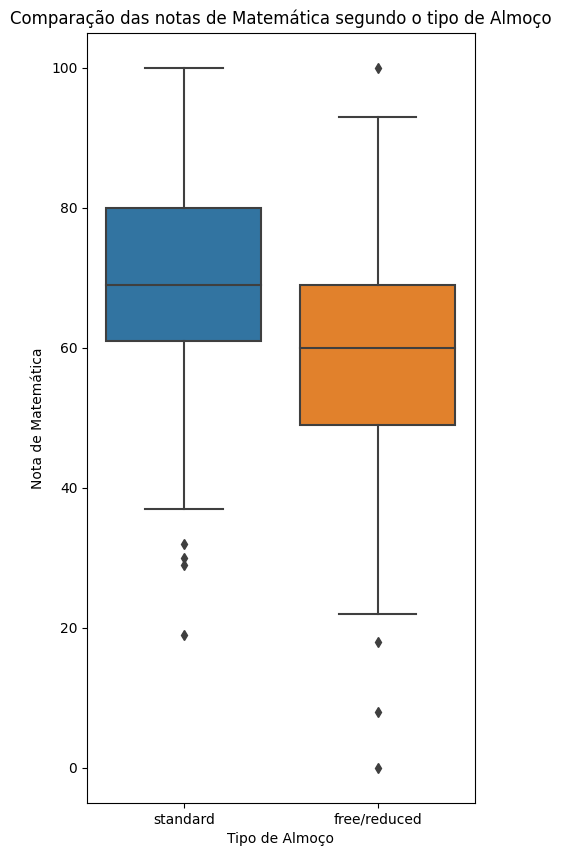

In [25]:
ax = sns.boxplot(data=df, x='Almoço', y='Matematica')
ax.figure.set_size_inches(5, 10)
ax.set_title('Comparação das notas de Matemática segundo o tipo de Almoço')
ax.set_xlabel('Tipo de Almoço')
ax.set_ylabel('Nota de Matemática')
ax